In [ ]:
import re
import xarray as xr
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt


In [15]:
CG = Path("/Users/jonniebarnsley/Downloads/CG")
misfit_pattern = r"\|\|fm\(x\)\|\|\^2 = ([\d.e+-]+)"
penalty_pattern = r"\|\|fp\(x\)\|\|\^2 = ([\d.e+-]+)"
misfit = {}
penalty = {}
for filename in CG.glob("aPhi*.txt"):
    with open(filename, "r") as f:
        data = f.read()
    fm = re.findall(misfit_pattern, data)
    fp = re.findall(penalty_pattern, data)
    fm = list(map(float, fm))
    fp = list(map(float, fp))
    misfit[filename.stem] = fm
    penalty[filename.stem] = fp


Text(0.5, 1.0, 'Misfit')

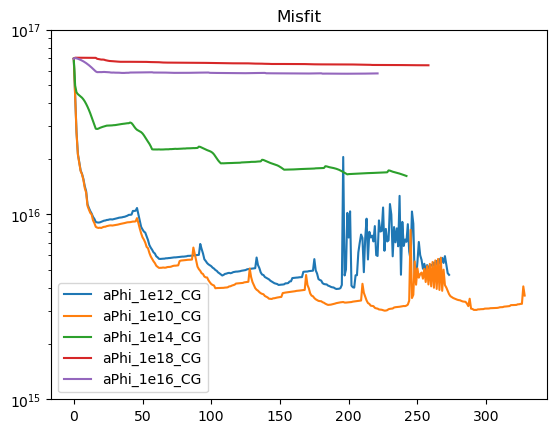

In [19]:
for key, item in misfit.items():
    plt.plot(item, label=key)
plt.yscale('log')
plt.ylim(1e15, 1e17)
plt.legend()
plt.title("Misfit")

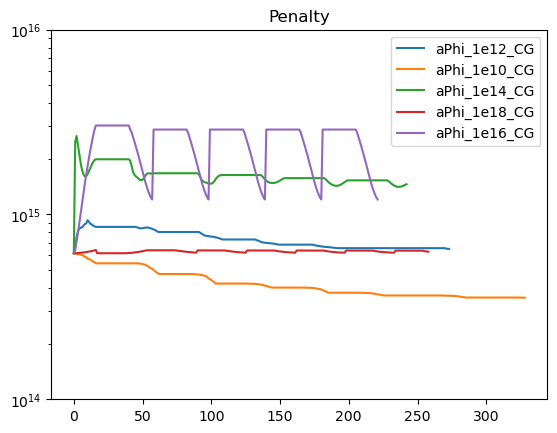

In [20]:
for key, item in penalty.items():
    plt.plot(item, label=key)
plt.yscale('log')
plt.ylim(1e14, 1e16)
plt.legend()
plt.legend()
plt.title('Penalty')
plt.show()

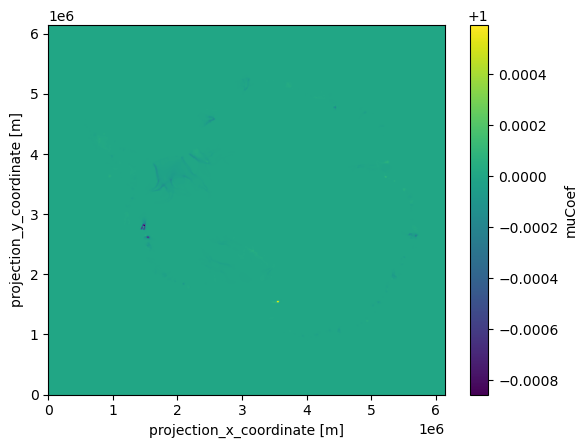

In [26]:
ctrl = Path("/Users/jonniebarnsley/Downloads/ctrl")
aPhi_1e18 = ctrl / "ctrl.lasagne.aPhi_1e18.03lev.000070000004.nc"

file = xr.open_dataset(aPhi_1e18)
file.muCoef.plot()

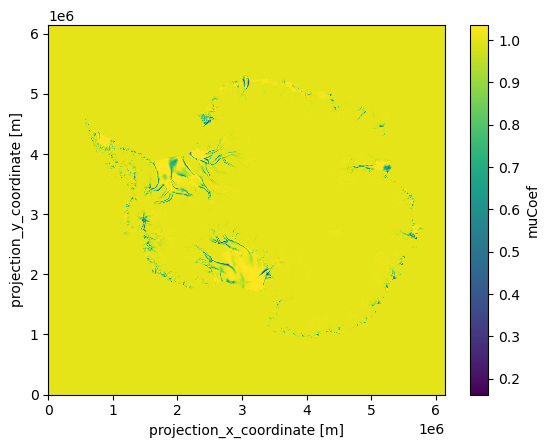

In [28]:
aPhi_1e10 = ctrl / "ctrl.lasagne.aPhi_1e10.03lev.000069000000.nc"
file = xr.open_dataset(aPhi_1e10)
file.muCoef.plot()

In [29]:
xVel = xr.open_dataset("/Users/jonniebarnsley/Downloads/high-aPhi_aPhi_1e12_xVel_3lev.nc").xVel
yVel = xr.open_dataset("/Users/jonniebarnsley/Downloads/high-aPhi_aPhi_1e12_yVel_3lev.nc").yVel
thk = xr.open_dataset("/Users/jonniebarnsley/Downloads/high-aPhi_aPhi_1e12_thickness_3lev.nc").thickness

In [31]:
speed = np.hypot(xVel, yVel)
speed.max()

<xarray.DataArray 'xVel' ()> Size: 8B
array(68932.35068187)

In [38]:
fast_ice_mask = speed > 1.5e4
fast_ice_mask.sum()

<xarray.DataArray 'xVel' ()> Size: 8B
array(18)

In [55]:
fast_thk = thk.where(fast_ice_mask)

In [43]:
print(fast_thk.values[~np.isnan(fast_thk.values)])

[442.43 801.79 756.29 712.77 761.16 829.74 821.4  714.23 814.2  804.86
 723.75 760.93 816.07 790.75 714.64 706.41 739.93 579.85]


In [44]:
thk = xr.open_dataset('/Users/jonniebarnsley/Downloads/high-aPhi_aPhi_1e10_thickness_0lev.nc').thickness
zb = xr.open_dataset('/Users/jonniebarnsley/Downloads/high-aPhi_aPhi_1e10_Z_base_0lev.nc').Z_base

In [45]:
grounded = zb > (-917/1027) * thk

In [51]:
start = grounded.isel(time=0).astype(int)
end = grounded.isel(time=-1).astype(int)

Text(0.5, 1.0, 'Grounding line change')

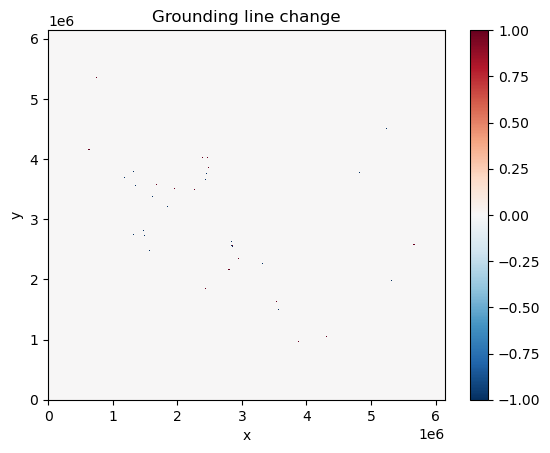

In [54]:
(start-end).plot()
plt.title('Grounding line change')